<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 109.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 174.2 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 170.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 122.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 137.7 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


--2025-10-04 23:28:19--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  63.7MB/s    in 2.4s    

2025-10-04 23:28:21 (63.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


#### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")


#### Display the first few rows to understand the structure of the data


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


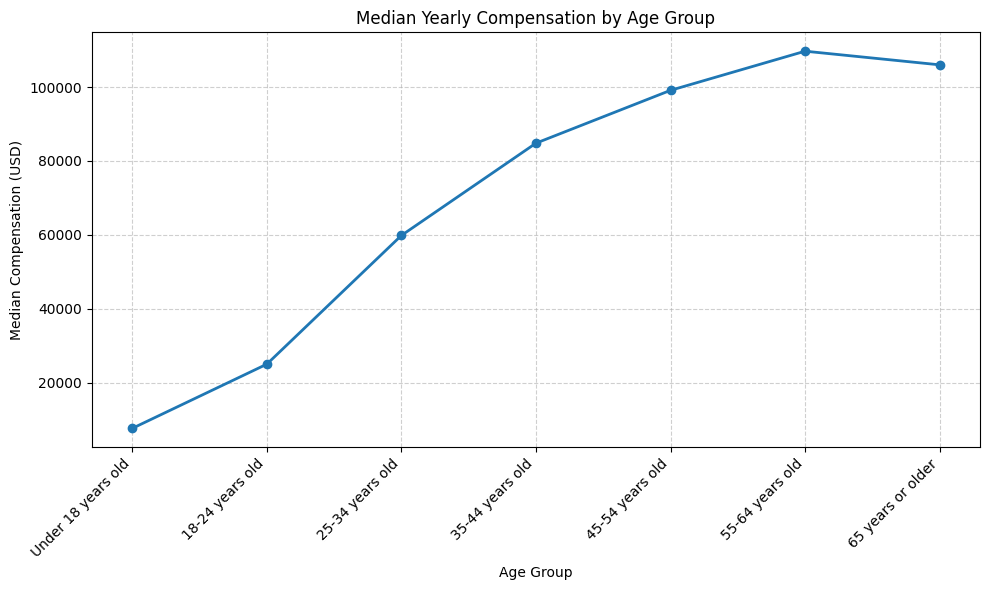

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values for relevant columns
df_comp = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Step 2: Group by Age and calculate the median compensation
median_comp = df_comp.groupby('Age')['ConvertedCompYearly'].median()

# Step 3: Define a logical age order and reindex (missing groups will be NaN)
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
median_comp = median_comp.reindex(age_order)

# Step 4: Drop age groups that have no data (avoids NaNs and mixed types)
median_comp = median_comp.dropna()

# Step 5: Plot using numeric x positions and set xtick labels to the age strings
x = range(len(median_comp))
y = median_comp.values
labels = median_comp.index.tolist()

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='#1f77b4', linewidth=2)
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(ticks=x, labels=labels, rotation=45, ha='right')
plt.tight_layout()
plt.show()



##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


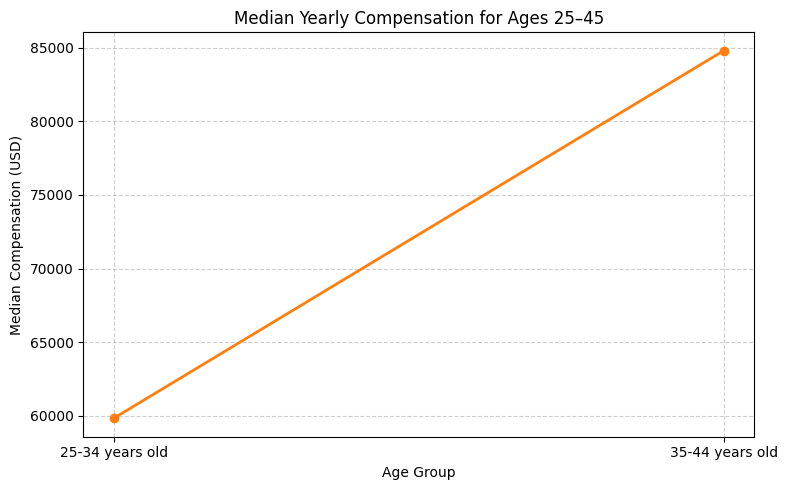

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values for relevant columns
df_comp = df.dropna(subset=['Age', 'ConvertedCompYearly'])

# Step 2: Group by Age and calculate the median compensation
median_comp = df_comp.groupby('Age')['ConvertedCompYearly'].median()

# Step 3: Define logical order and reindex
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
median_comp = median_comp.reindex(age_order)

# Step 4: Filter to ages 25–45 (i.e., the 25–34 and 35–44 groups)
median_comp_25_45 = median_comp.loc[['25-34 years old', '35-44 years old']].dropna()

# Step 5: Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(
    median_comp_25_45.index,
    median_comp_25_45.values,
    marker='o',
    linewidth=2,
    color='#ff7f0e'
)
plt.title('Median Yearly Compensation for Ages 25–45')
plt.xlabel('Age Group')
plt.ylabel('Median Compensation (USD)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


/tmp/ipykernel_355/2328361207.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp['YearsCodePro'] = df_exp['YearsCodePro'].apply(convert_years)


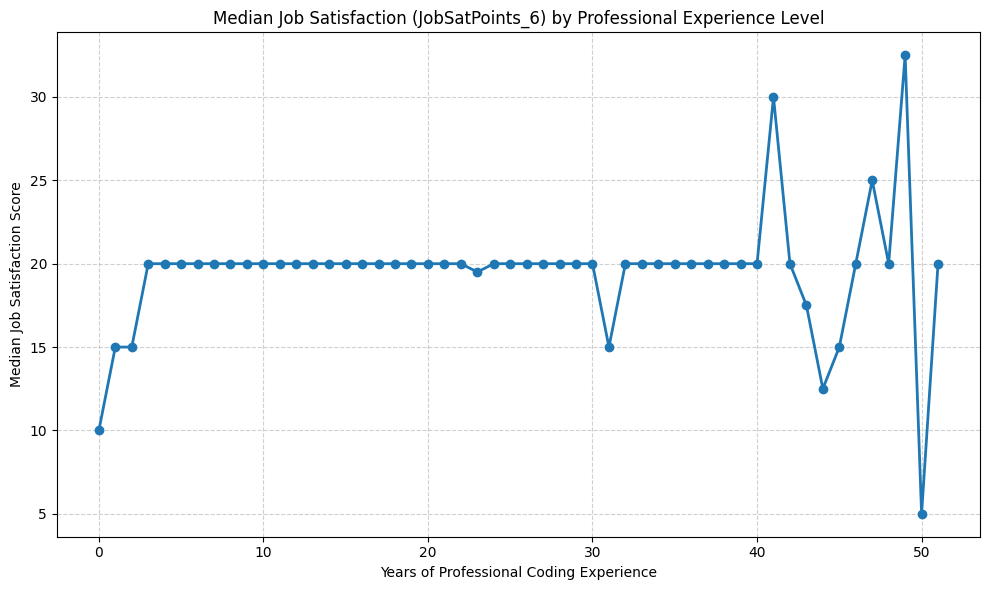

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values for relevant columns
df_exp = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

# Step 2: Convert 'YearsCodePro' to numeric (handle non-numeric values like 'Less than 1 year', 'More than 50 years')
def convert_years(value):
    if isinstance(value, str):
        value = value.strip()
        if value.lower() == 'less than 1 year':
            return 0
        elif value.lower() == 'more than 50 years':
            return 51
    try:
        return float(value)
    except:
        return None

df_exp['YearsCodePro'] = df_exp['YearsCodePro'].apply(convert_years)

# Step 3: Drop rows where conversion failed
df_exp = df_exp.dropna(subset=['YearsCodePro'])

# Step 4: Group by experience level and compute median job satisfaction
median_js = df_exp.groupby('YearsCodePro')['JobSatPoints_6'].median().reset_index()

# Step 5: Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(median_js['YearsCodePro'], median_js['JobSatPoints_6'], marker='o', color='#1f77b4', linewidth=2)
plt.title('Median Job Satisfaction (JobSatPoints_6) by Professional Experience Level')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


/tmp/ipykernel_355/3173604780.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp_comp['YearsCodePro'] = (


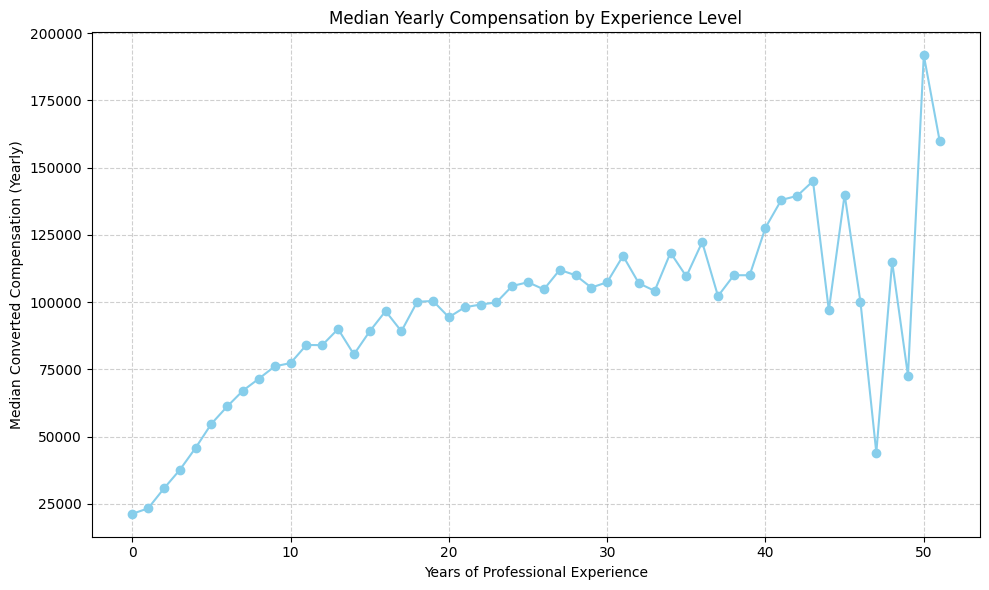

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values for experience and compensation
df_exp_comp = df.dropna(subset=['YearsCodePro', 'ConvertedCompYearly'])

# Step 2: Convert experience to numeric, handling values like 'Less than 1 year' or 'More than 50 years'
df_exp_comp['YearsCodePro'] = (
    df_exp_comp['YearsCodePro']
    .replace('Less than 1 year', 0)
    .replace('More than 50 years', 51)
    .astype(float)
)

# Step 3: Compute median compensation by experience level
median_comp = df_exp_comp.groupby('YearsCodePro')['ConvertedCompYearly'].median()

# Step 4: Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(median_comp.index, median_comp.values, marker='o', color='skyblue')
plt.title('Median Yearly Compensation by Experience Level')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Median Converted Compensation (Yearly)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


/tmp/ipykernel_355/3713564569.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp_js['YearsCodePro'] = (


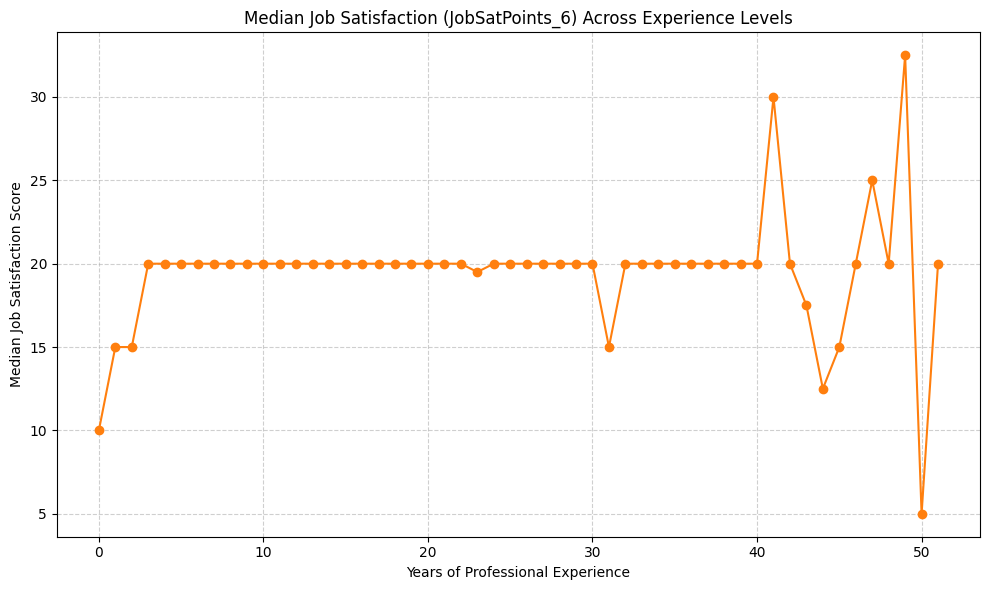

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Drop missing values for experience and job satisfaction
df_exp_js = df.dropna(subset=['YearsCodePro', 'JobSatPoints_6'])

# Step 2: Convert experience column to numeric
df_exp_js['YearsCodePro'] = (
    df_exp_js['YearsCodePro']
    .replace('Less than 1 year', 0)
    .replace('More than 50 years', 51)
    .astype(float)
)

# Step 3: Compute median job satisfaction by experience level
median_js = df_exp_js.groupby('YearsCodePro')['JobSatPoints_6'].median()

# Step 4: Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(median_js.index, median_js.values, marker='o', color='#ff7f0e')
plt.title('Median Job Satisfaction (JobSatPoints_6) Across Experience Levels')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Median Job Satisfaction Score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
